# Model Selection

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
df=pd.read_csv("titanic_dataset (2).csv")

In [9]:
df_i=df.set_index('PassengerId')
print(df_i)


             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   
...               ...     ...   
887                 0       2   
888                 1       1   
889                 0       3   
890                 1       1   
891                 0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   
...       

In [10]:
df_i.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df_i.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [12]:
df_i.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
df_i.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [14]:

df_i.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:

df_i.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [16]:

df_i.isna().sum()


Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [17]:

df_i.shape

(891, 11)

In [18]:

df_i.isna().sum()/df_i.shape[0]*100

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

In [19]:

df_i.isna().sum().sum()

866

Text(0, 0.5, 'Frequency')

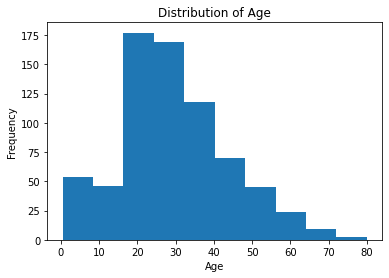

In [20]:
plt.hist(df_i['Age'])
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

In [21]:
age_median=df_i['Age'].median()
age_median


28.0

In [22]:
df_i['Age']=df_i['Age'].fillna(age_median)
df_i.isna().sum()


Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [23]:
df_i['Cabin'].value_counts()


B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [24]:
cabin_mode=df_i['Cabin'].mode()[0]
cabin_mode


'B96 B98'

In [25]:
df_i['Cabin']=df_i['Cabin'].fillna(cabin_mode)
df_i.isna().sum()


Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    2
dtype: int64

In [26]:
embrkd_mode=df_i['Embarked'].mode()
embrkd_mode


0    S
Name: Embarked, dtype: object

In [27]:
df_i['Embarked']=df_i['Embarked'].fillna(cabin_mode)
df_i.isna().sum()



Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

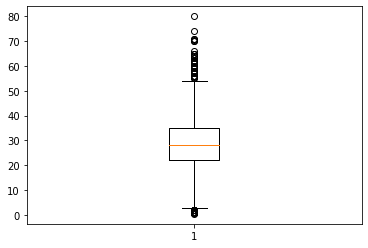

In [28]:
plt.boxplot(df_i['Age'])
plt.show()


In [29]:
#Outlier indexes
out1_index=np.where(df_i['Age']>50)
print(out1_index)



(array([  6,  11,  15,  33,  54,  94,  96, 116, 124, 150, 152, 155, 170,
       174, 195, 222, 232, 249, 252, 262, 268, 275, 280, 317, 326, 366,
       406, 438, 449, 456, 467, 483, 487, 492, 493, 496, 513, 545, 555,
       570, 571, 582, 587, 591, 625, 626, 630, 631, 647, 659, 672, 684,
       694, 695, 714, 745, 765, 772, 774, 820, 829, 851, 857, 879],
      dtype=int64),)


In [30]:
df_i=df_i.drop(out1_index[0])
df_i.shape

(827, 11)

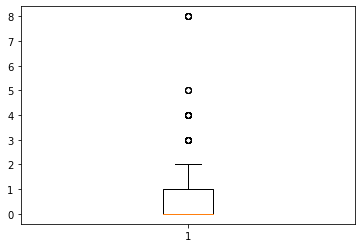

In [31]:
plt.boxplot(df_i['SibSp'])
plt.show()


In [32]:
#Outlier indexes
out2_index=np.where(df_i['SibSp']>2)
print(out2_index)


(array([  6,  13,  21,  24,  46,  54,  58,  63,  66,  80,  83, 111, 147,
       152, 158, 162, 166, 168, 186, 213, 216, 246, 256, 300, 316, 348,
       360, 382, 449, 453, 504, 505, 586, 594, 634, 671, 728, 733, 754,
       764, 785, 800], dtype=int64),)


In [33]:
#Exclude the Outliers

#df_i=df_i.drop(out2_index[0])
df_i.shape



(827, 11)

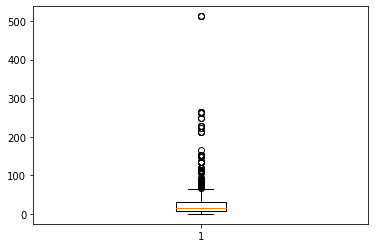

In [34]:
plt.boxplot(df_i['Fare'])
plt.show()


In [35]:
#Outlier indexes
out3_index=np.where(df_i['Fare']>100)
print(out3_index)


(array([ 24,  28,  83, 110, 180, 200, 239, 247, 248, 274, 276, 282, 283,
       284, 288, 294, 295, 307, 309, 312, 316, 347, 351, 354, 364, 367,
       408, 410, 462, 469, 490, 500, 512, 518, 565, 609, 610, 628, 637,
       644, 646, 654, 661, 675, 682, 687, 707, 720, 743], dtype=int64),)


In [ ]:
#Exclude outliere
df_i=df_i.drop(out3_index[0])
df_i.shape
